# The below is the sales dataset of items for shopping malls and big market. The dataset contains item and customer informations. 
- To Analyse and Visualize the different aspects of sales
- To find out the sales in near future with the informations from the dataset.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the datasets 

In [3]:
train = pd.read_csv('Train.csv')

In [4]:
test = pd.read_csv('Test.csv')

In [5]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
test.shape[0]

5681

### Percentage of missing values :


In [12]:
print('TEST MISSING PERCENTAGE: \n\n\n',(test.isnull().sum() / test.shape[0])*100)

TEST MISSING PERCENTAGE: 


 Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [13]:
print('TRAIN MISSING PERCENTAGE: \n\n\n',(train.isnull().sum() / train.shape[0])*100)

TRAIN MISSING PERCENTAGE: 


 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


We have 17% if item weights missing and 28% of Outlet size missing from both test and train dataset 

## Data Cleaning 

Check if there is any presence of any outiers and it can be done using a boxplot 

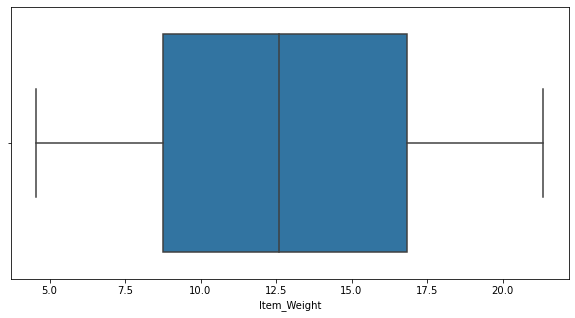

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot('Item_Weight', data = train);

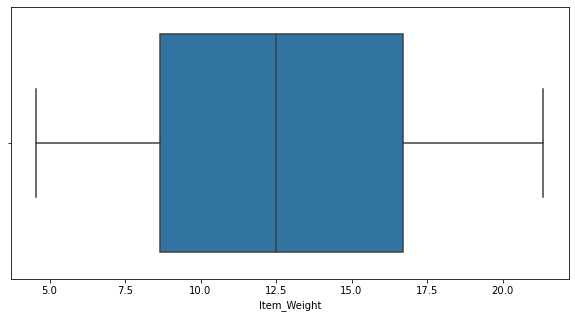

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot('Item_Weight', data = test);

We can conclude that there is no outliers from the box plot.and hence we can go with mean or mode. 

In [16]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [17]:
train.Item_Weight.isna().sum()

0

In [18]:
test.Item_Weight.isna().sum()

0

Taking the mode (The most repeated value) to fill the NA in case of non numeric columns 

In [19]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [20]:
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode()[0])

In [21]:
train.Outlet_Size.isna().sum()

0

In [22]:
train.Outlet_Size.isna().sum()

0

## Exploratory Data Analysis 

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [28]:
train.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace= True)

In [29]:
test.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace= True)

In [30]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [32]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


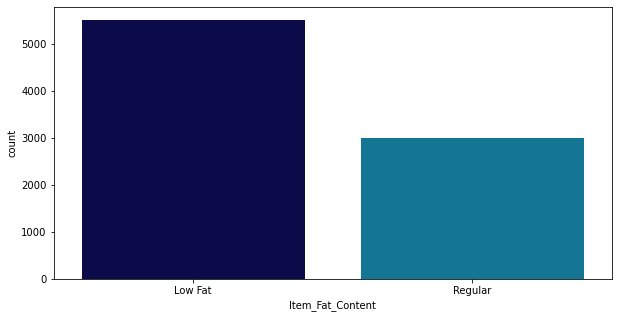

In [34]:
plt.figure(figsize = (10,5))

sns.countplot('Item_Fat_Content', data = train, palette= 'ocean') 
plt.show()

As you can see form the graph, The number of Low fat foods are majorly stored in the shop compared to the Regular food source. 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

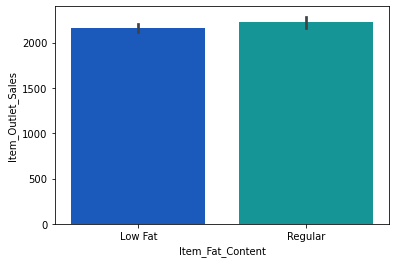

In [37]:
sns.barplot(train.Item_Fat_Content, train.Item_Outlet_Sales, palette='winter')

The above graph shows the actual sales of Low fat and Regular foods. 

From the graph, We can see that Regular food are just in par or sold a bit more compared to Low fat foods, while from the previous graph we can say that more number of Low fat food is being stored in the market. 


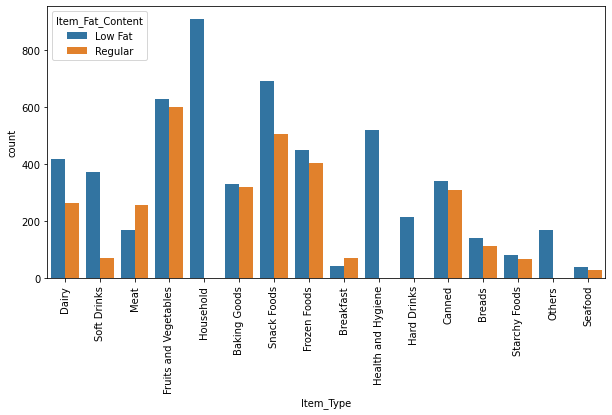

In [35]:
plt.figure(figsize= (10,5))
sns.countplot('Item_Type', data = train, hue = 'Item_Fat_Content')
plt.xticks(rotation = '90')
plt.show()

This plot specifies the count of stored food as Low fat or Regular based on foods. 

If we analyse the graph, a high number of  Household foods been stored as low fat compared to fruits and vegetables as Regular fat. While, the lowest falls under Seafoods for both Low fat and Regular. 

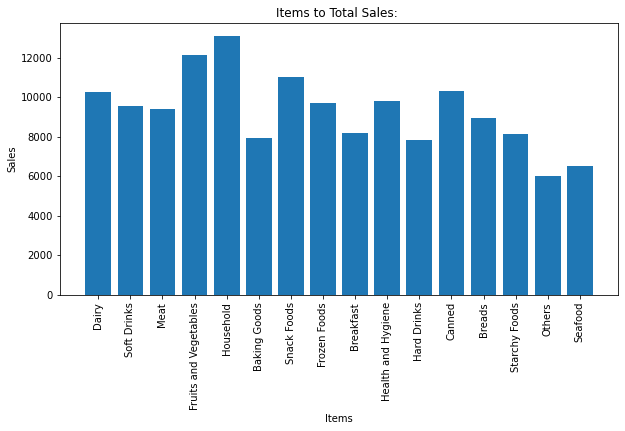

In [36]:
plt.figure(figsize=(10,5))
plt.bar(train['Item_Type'], train['Item_Outlet_Sales'], )
plt.xlabel('Items')
plt.ylabel('Sales')
plt.title('Items to Total Sales: ')
plt.xticks(rotation = 90);

The above graph plots the actual sales in the market.   

From this plot, we can say that Household foods are in high demand with highest number of sales followed by Fruits and Vegetables. Hence, it makes sense to store high nummber of Household foods in the shop.

We can also say that from the the sales of Seafoods are more compared to the food stored. 

In [38]:
train.Item_Visibility.replace(0, train.Item_Visibility.mean(), inplace=True)
test.Item_Visibility.replace(0, test.Item_Visibility.mean(),inplace=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

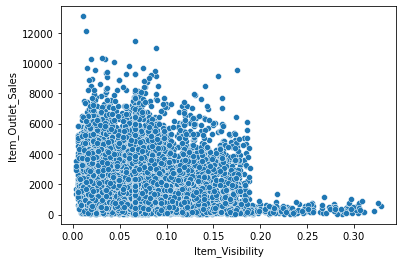

In [39]:
sns.scatterplot(train.Item_Visibility, train.Item_Outlet_Sales)

Item_Visibility is the easieness for customers to find the items in a store. 

From the above graph, we can say that, The less visible items an=re being sold more while the more visible items are in less demand 

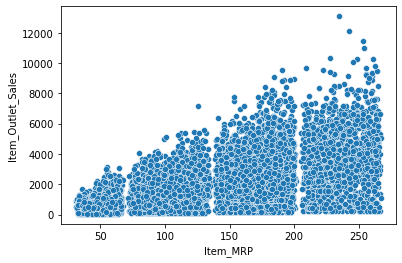

In [40]:
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data = train);

From this plot, we can clearly see that items with MRP over 200 is sold more and the least is sold with items price below 75 

Text(0.5, 1.0, 'Best item sales of each location')

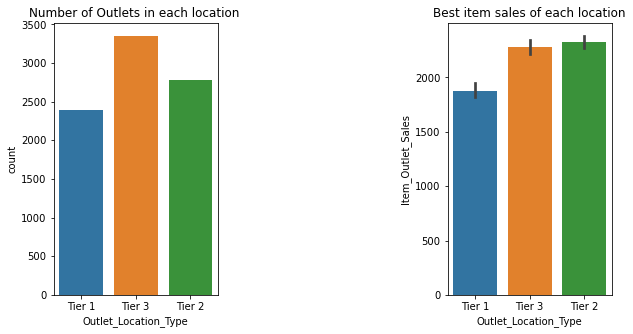

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.countplot(train.Outlet_Location_Type)
plt.title('Number of Outlets in each location ')


plt.subplot(1,3,3)
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', data = train)
plt.title('Best sales outlet of each location')

Above is 2 plots, First plot shows the total numer of outlet locations in each city [tire1, tire2, tire3] and Second plot is the sales in each city. 

If we analyse the second graph, we can see that Tire 2 location has the highest sales followed by Tire 3 and Tire 1. 
While, after analysing the first graph, its shown that more number of outlets are constructed on Tire 3 location  followed by Tire 2 and Tire 1. 

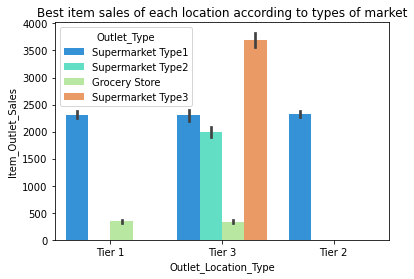

In [42]:
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', data = train, hue = 'Outlet_Type', palette='rainbow')
plt.title('Best item sales of each location according to types of market');

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1, inplace= True)
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1, inplace= True)

In [45]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [46]:
x = pd.get_dummies(train.drop('Item_Outlet_Sales', axis = 1), drop_first= True)

In [47]:
y = train.Item_Outlet_Sales

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear = LinearRegression(normalize= True, n_jobs=-1)

In [51]:
linear.fit(x_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [89]:
x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300000,0.026300,79.4302,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2957,7.930000,0.071136,42.7086,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7031,14.500000,0.041313,42.0454,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1084,12.857645,0.044767,173.7054,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
856,10.195000,0.012456,197.5110,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [53]:
pred = linear.predict(x_test)

In [54]:
pred

array([1331.53143438,  781.85675575,  832.06102875, ..., 1089.75493425,
       2173.17680907, 3895.87473808])

In [55]:
linear.coef_

array([-1.45166156e+00, -4.44294205e+02,  1.58062548e+01,  7.69613319e+01,
       -1.82291938e+01,  2.64507054e+01,  2.54041134e+01, -1.05235571e+02,
       -2.75672255e+01,  4.20954931e+01,  1.82550991e+01,  3.63524179e+01,
        1.36090673e+01, -1.46141477e+01, -7.56569766e+00,  3.46400452e+02,
       -1.03784305e+01, -3.29513910e+01,  3.33947645e+01, -3.84759036e+01,
       -2.94372357e+01, -7.91202631e-01, -6.94720240e+00,  1.96263289e+03,
        1.65892879e+03,  3.35570702e+03])

### Check the goodness of fit 

In [56]:
from sklearn import metrics

In [57]:
print('LINEAR REGRESSION :\n')
print(f'The mean squared error is {metrics.mean_squared_error(y_test, pred)}\
\nThe mean absolute error is {metrics.mean_absolute_error(y_test, pred)} \
\nThe Root mean squared value is {np.sqrt(metrics.mean_squared_error(y_test, pred))}')

LINEAR REGRESSION :

The mean squared error is 1213553.205579095
The mean absolute error is 811.746080929224 
The Root mean squared value is 1101.6139094887533


In [58]:
r2 = metrics.r2_score(y_test, pred)

In [59]:
r2    # This means 56% of the output can be explained by the input data 

0.5667418743654593

In [93]:
linear

LinearRegression(n_jobs=-1, normalize=True)

# Using Randim Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
forest = RandomForestRegressor()

In [62]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,7.720000,0.147904,116.6466,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
655,19.750000,0.014301,103.0332,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2229,12.857645,0.054221,129.1310,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2537,19.350000,0.118342,222.6088,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3528,18.350000,0.092150,184.8266,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395000,0.286345,139.1838,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
5191,15.600000,0.117575,75.6670,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
5390,17.600000,0.018944,237.3590,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
860,20.350000,0.054363,117.9466,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [63]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [64]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
pred = forest.predict(x_test)

### Check the goodness of fit  

In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.536608521694261

In [69]:
from sklearn.model_selection import GridSearchCV

In [72]:
params = [{'criterion' : ['mse', 'mae']}, {'n_estimators' : range(0,100)}, {'max_depth' : range(0,20)}]

In [73]:
from sklearn.model_selection import KFold

In [78]:
grid = GridSearchCV(forest, params, n_jobs= -1, cv = KFold(), scoring= 'roc_auc')

In [67]:
train.shape

(8523, 9)

In [79]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['mse', 'mae']},
                         {'n_estimators': range(0, 100)},
                         {'max_depth': range(0, 20)}],
             scoring='roc_auc')

In [80]:
grid.best_params_

{'criterion': 'mse'}

### As we can see, The hyper tuning of parameters still gives the same condition of default values used above. 